<font style="font-size:28px;" align="left"><b> 1D discrete quantum walk </b></font>
<br>

In [48]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
import matplotlib.pyplot as plt
import numpy as np

# Define the number of position qubits (3 qubits for 8 nodes)
n_qubits_per_dim = 3

N_per_dim = 2**n_qubits_per_dim

matrix_minus = np.zeros(N_per_dim**2).reshape(N_per_dim, N_per_dim)
matrix_minus[np.eye(len(matrix_minus), k=1, dtype='bool')] = 1
matrix_minus[N_per_dim-1, 0] = 1

matrix_plus = np.zeros(N_per_dim**2).reshape(N_per_dim, N_per_dim)
matrix_plus[np.eye(len(matrix_plus), k=-1, dtype='bool')] = 1
matrix_plus[0, N_per_dim-1] = 1

gate_plus = UnitaryGate(matrix_plus, label="step plus")
gate_minus = UnitaryGate(matrix_minus, label="step minus")

# Define a single step of the quantum walk
def quantum_walk_step(qc, n_qubits_per_dim):    
    # Hadamard gate on the walker qubit
    qc.h(2*n_qubits_per_dim)
    qc.append(gate_plus.control (1, ctrl_state=1), list(np.append([2*n_qubits_per_dim], range(0, n_qubits_per_dim))))
    qc.append(gate_minus.control(1, ctrl_state=0), list(np.append([2*n_qubits_per_dim], range(0, n_qubits_per_dim))))

    qc.h(2*n_qubits_per_dim)
    qc.append(gate_plus.control (1, ctrl_state=1), list(np.append([2*n_qubits_per_dim], range(n_qubits_per_dim, 2*n_qubits_per_dim))))
    qc.append(gate_minus.control(1, ctrl_state=0), list(np.append([2*n_qubits_per_dim], range(n_qubits_per_dim, 2*n_qubits_per_dim))))

In [46]:
# Create the quantum circuit
qc = QuantumCircuit(2*n_qubits_per_dim + 1, 2*n_qubits_per_dim)

display(qc.draw(reverse_bits=True))

q_6: 
     
q_5: 
     
q_4: 
     
q_3: 
     
q_2: 
     
q_1: 
     
q_0: 
     
c: 6/

In [44]:
# Apply multiple steps of the quantum walk
num_steps = 3
for _ in range(num_steps):
    quantum_walk_step(qc, n_qubits_per_dim)

display(qc.draw(reverse_bits=True))

┌───┐                             ┌───┐                             ┌───┐»
q_6: ┤ H ├──────■──────────────o───────┤ H ├──────■──────────────o───────┤ H ├»
     └───┘      │              │       └───┘┌─────┴──────┐┌──────┴──────┐└───┘»
q_5: ───────────┼──────────────┼────────────┤2           ├┤2            ├─────»
                │              │            │            ││             │     »
q_4: ───────────┼──────────────┼────────────┤1 step plus ├┤1 step minus ├─────»
                │              │            │            ││             │     »
q_3: ───────────┼──────────────┼────────────┤0           ├┤0            ├─────»
          ┌─────┴──────┐┌──────┴──────┐     └────────────┘└─────────────┘     »
q_2: ─────┤2           ├┤2            ├───────────────────────────────────────»
          │            ││             │                                       »
q_1: ─────┤1 step plus ├┤1 step minus ├───────────────────────────────────────»
          │            ││             │                                       »
q_0: ─────┤0           ├┤0            ├───────────────────────────────────────»
          └────────────┘└─────────────┘                                       »
c: 6/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                                  ┌───┐                             ┌───┐»
«q_6: ──────■──────────────o───────┤ H ├──────■──────────────o───────┤ H ├»
«           │              │       └───┘┌─────┴──────┐┌──────┴──────┐└───┘»
«q_5: ──────┼──────────────┼────────────┤2           ├┤2            ├─────»
«           │              │            │            ││             │     »
«q_4: ──────┼──────────────┼────────────┤1 step plus ├┤1 step minus ├─────»
«           │              │            │            ││             │     »
«q_3: ──────┼──────────────┼────────────┤0           ├┤0            ├─────»
«     ┌─────┴──────┐┌──────┴──────┐     └────────────┘└─────────────┘     »
«q_2: ┤2           ├┤2            ├───────────────────────────────────────»
«     │            ││             │                                       »
«q_1: ┤1 step plus ├┤1 step minus ├───────────────────────────────────────»
«     │            ││             │                                       »
«q_0: ┤0           ├┤0            ├───────────────────────────────────────»
«     └────────────┘└─────────────┘                                       »
«c: 6/════════════════════════════════════════════════════════════════════»
«                                                                         »
«                                  ┌───┐                             
«q_6: ──────■──────────────o───────┤ H ├──────■──────────────o───────
«           │              │       └───┘┌─────┴──────┐┌──────┴──────┐
«q_5: ──────┼──────────────┼────────────┤2           ├┤2            ├
«           │              │            │            ││             │
«q_4: ──────┼──────────────┼────────────┤1 step plus ├┤1 step minus ├
«           │              │            │            ││             │
«q_3: ──────┼──────────────┼────────────┤0           ├┤0            ├
«     ┌─────┴──────┐┌──────┴──────┐     └────────────┘└─────────────┘
«q_2: ┤2           ├┤2            ├──────────────────────────────────
«     │            ││             │                                  
«q_1: ┤1 step plus ├┤1 step minus ├──────────────────────────────────
«     │            ││             │                                  
«q_0: ┤0           ├┤0            ├──────────────────────────────────
«     └────────────┘└─────────────┘                                  
«c: 6/═══════════════════════════════════════════════════════════════
«

{'000001': 62581, '000010': 12386, '000011': 12441, '000000': 12592}


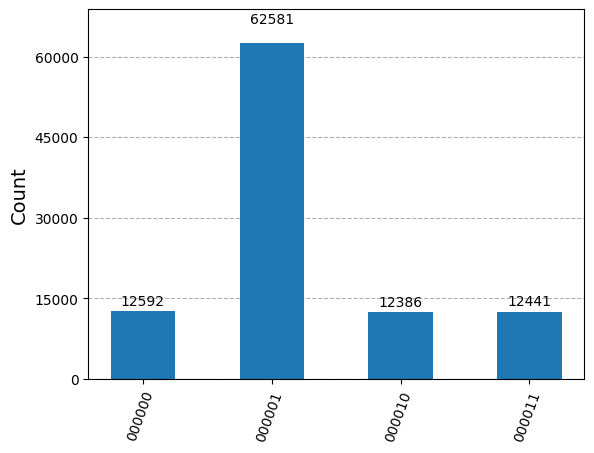

In [38]:
# Measure the position qubits
qc.measure(range(n_position_qubits), range(n_position_qubits))

num_shots = 100000
backend = AerSimulator()
comp = transpile(qc, backend) # transpile means transform a quantum circuit into a form that is optimized for execution on a specific quantum backend
job_sim = backend.run(comp, shots=num_shots) # run the circuit
counts = job_sim.result().get_counts(comp) # extract the results of the code execution (how many counts of which measurement I got)
print(counts)

# Get the counts and plot the histogram

plot_histogram(counts)

In [60]:
import numpy as np

def generate_permutation_matrix(n):
    # Create an identity matrix of size n
    identity_matrix = np.eye(n)
    
    # Generate a random permutation of indices
    permuted_indices = np.random.permutation(n)
    
    # Apply the permutation to the rows of the identity matrix
    permutation_matrix = identity_matrix[permuted_indices]
    
    return permutation_matrix

# Example usage
n = 2**12
perm_matrix = generate_permutation_matrix(n)
# print(perm_matrix)

gate_perm = UnitaryGate(perm_matrix)
